In [148]:
import os
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plot

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split as tts, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Imputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, tree, DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, tree, DecisionTreeRegressor

In [115]:
os.chdir("D:/GreyAtom/Datasets")
df = pd.read_csv("dc_airbnb.csv")

In [116]:
numeric_df = df._get_numeric_data()
numeric_cols = list(numeric_df)

In [117]:
imp_numeric = Imputer(missing_values="NaN", strategy="mean", axis=1)
imp_numeric.fit(numeric_df)
numeric_df = imp_numeric.fit_transform(numeric_df)

In [118]:
numeric_df = pd.DataFrame(numeric_df)
numeric_df.columns = numeric_cols

In [119]:
categorical_cols = df.select_dtypes(exclude = np.number)
categorical_cols = categorical_cols.drop(["security_deposit", "cleaning_fee", "zipcode"], axis = 1)

In [120]:
categorical_cols["price"] = categorical_cols["price"].str.replace(',', '')
categorical_cols["price"] = categorical_cols["price"].str.replace('$', '')
categorical_cols["price"] = categorical_cols["price"].astype(float)

categorical_cols["host_response_rate"] = categorical_cols["host_response_rate"].str.replace('%', '')
categorical_cols["host_response_rate"] = categorical_cols["host_response_rate"].astype(float)

categorical_cols["host_acceptance_rate"] = categorical_cols["host_acceptance_rate"].str.replace('%', '')
categorical_cols["host_acceptance_rate"] = categorical_cols["host_acceptance_rate"].astype(float)

In [121]:
airbnbdf = pd.concat([numeric_df, categorical_cols], axis=1)

In [122]:
airbnbdf["host_response_rate"].replace(np.nan, airbnbdf["host_response_rate"].mean(), inplace=True)

In [123]:
airbnbdf["host_acceptance_rate"].replace(np.nan, airbnbdf["host_acceptance_rate"].mean(), inplace=True)

In [124]:
airbnbdf = pd.get_dummies(airbnbdf)

X = airbnbdf.drop(["price"], axis=1)
y = airbnbdf["price"]

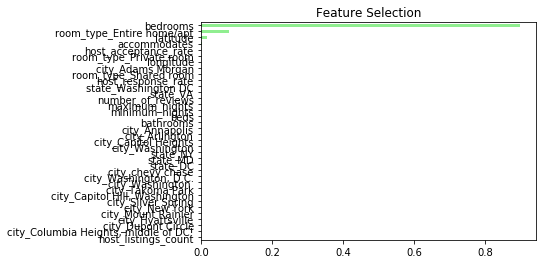

In [125]:
#rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf = RandomForestRegressor(n_estimators=3000,
                           min_samples_leaf=0.12,
                          random_state = 42)
rf.fit(X, y)

importances = pd.Series(data=rf.feature_importances_, index = X.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color="lightgreen")
plt.title('Feature Selection')
plt.show()

In [138]:
scaler = MinMaxScaler()
airbnbdf = pd.DataFrame(scaler.fit_transform(airbnbdf), columns=airbnbdf.columns)

In [139]:
airbnbdf.head(5)
X = airbnbdf[['room_type_Entire home/apt','accommodates','host_listings_count','room_type_Private room']]
y = airbnbdf["price"]

In [140]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)
score = reg_all.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(score, mse, rmse)

0.2623421462608173 0.0011897213466209747 0.034492337505900854


In [143]:
X = airbnbdf[['room_type_Entire home/apt','bedrooms', 'latitude']]
y = airbnbdf["price"]

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(score, mse, rmse)

0.3163635807419002 0.0011025936173472413 0.03320532513539419


In [150]:
dt = DecisionTreeRegressor(max_depth=9, criterion="mse", min_samples_leaf=0.12)
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(score, mse)

0.31628409527148194 0.0011027218143974367


In [154]:
bc = BaggingRegressor(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(score, mse)

bc.oob_score_

0.31628409527148194 0.0011024941189434882


0.2136988323022745